### Importing Libraries 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Calling DataFrames

In [2]:
#calling train dataset
ds_mal_train=pd.read_csv("malignant_train.csv")
ds_mal_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
#calling test data
ds_mal_test=pd.read_csv("malignant_test.csv",encoding='latin1')
ds_mal_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


### Describing Information

In [4]:
#describing information
ds_mal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


### Seperating Input and Output Variables

In [5]:
#seperating input variable
comment = ds_mal_train['comment_text']
print(comment.head())
comment = comment.to_numpy()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object


In [6]:
#seperating Output variable
label = ds_mal_train[['malignant', 'highly_malignant' , 'rude' , 'threat' , 'abuse' , 'loathe']]
print(label.head())
label = label.to_numpy()

   malignant  highly_malignant  rude  threat  abuse  loathe
0          0                 0     0       0      0       0
1          0                 0     0       0      0       0
2          0                 0     0       0      0       0
3          0                 0     0       0      0       0
4          0                 0     0       0      0       0


### Frequency of Occurrence of Multi Labelled Data 

In [7]:
#counting the frequency of accurance of multi labelled data

#ct1 = comments having atlest one label
#ct2 = comments having multi label

ct1,ct2 = 0,0
for i in range(label.shape[0]):
    ct = np.count_nonzero(label[i])
    if ct :
        ct1 = ct1+1
    if ct>1 :
        ct2 = ct2+1
print(ct1)
print(ct2)

16225
9865


### Data Visualization

malignant


0    144277
1     15294
Name: malignant, dtype: int64


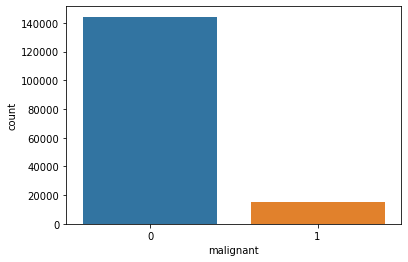

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


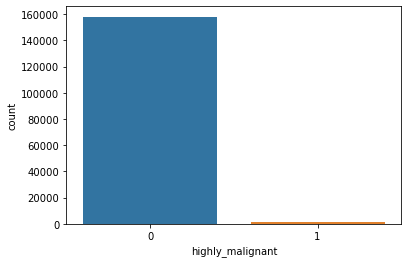

loathe


0    158166
1      1405
Name: loathe, dtype: int64


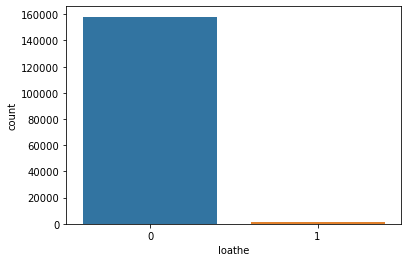

rude


0    151122
1      8449
Name: rude, dtype: int64


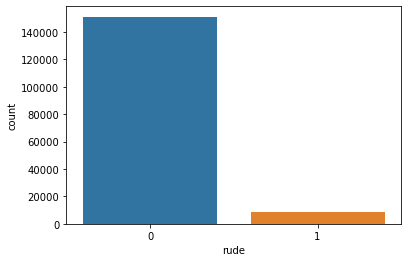

abuse


0    151694
1      7877
Name: abuse, dtype: int64


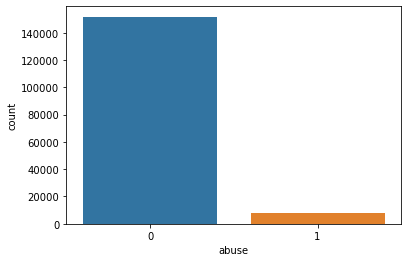

threat


0    159093
1       478
Name: threat, dtype: int64


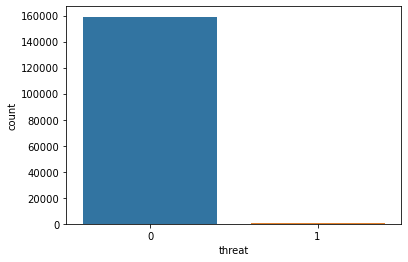

In [8]:
#plotting counts of 0s and 1s for all the variables

col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(ds_mal_train[i].value_counts())
    sns.countplot(ds_mal_train[i])
    plt.show()

average length of comment: 393.539


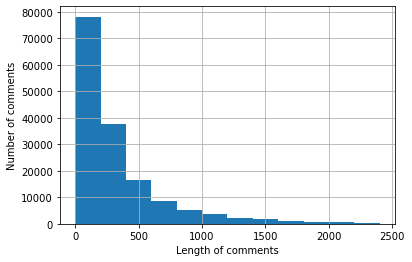

In [9]:
#plotting length of comments in a histogram
x = [len(comment[i]) for i in range(comment.shape[0])]
print('average length of comment: {:.3f}'.format(sum(x)/len(x)))
bins = [1,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.grid(True)
plt.show()

average length of comment: 393.539


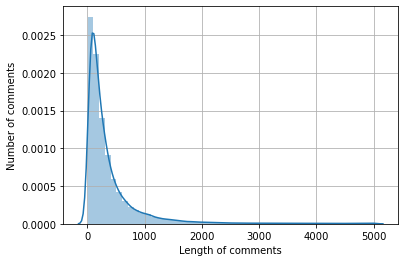

In [10]:
#plotting length of comments in a distribution plot
x = [len(comment[i]) for i in range(comment.shape[0])]
print('average length of comment: {:.3f}'.format(sum(x)/len(x)))
sns.distplot(x)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')  
plt.axis()
plt.grid(True)
plt.show()

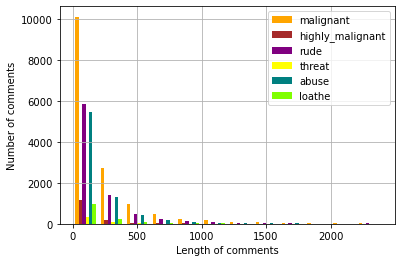

In [11]:
#plotting lenghts of various kinds of comments 
y = np.zeros(label.shape)
for ix in range(comment.shape[0]):
    l = len(comment[ix])
    if label[ix][0] :
        y[ix][0] = l
    if label[ix][1] :
        y[ix][1] = l
    if label[ix][2] :
        y[ix][2] = l
    if label[ix][3] :
        y[ix][3] = l
    if label[ix][4] :
        y[ix][4] = l
    if label[ix][5] :
        y[ix][5] = l

labelsplt = ['malignant', 'highly_malignant' , 'rude' , 'threat' , 'abuse' , 'loathe']
color = ['orange','brown','purple','yellow','teal','chartreuse']        
plt.hist(y,bins = bins,label = labelsplt,color = color)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.legend()
plt.grid(True)
plt.show()

### Creating New Column

In [12]:
#we are creating a new column to get the length of the comments
ds_mal_train['length'] = ds_mal_train['comment_text'].str.len()
ds_mal_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


### Feaure Engineering

In [13]:
#converting messages to lower case of train data
ds_mal_train['comment_text'] = ds_mal_train['comment_text'].str.lower()

In [14]:
#converting email address with email of train data
ds_mal_train['comment_text'] = ds_mal_train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [15]:
#replacing URLs with 'webaddress' of train data
ds_mal_train['comment_text'] = ds_mal_train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [16]:
#replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156) of train data
ds_mal_train['comment_text'] = ds_mal_train['comment_text'].str.replace(r'£|\$', 'dollers')

In [17]:
#replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber' of train data
ds_mal_train['comment_text'] = ds_mal_train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [18]:
#replace numbers with 'numbr' of train data
ds_mal_train['comment_text'] = ds_mal_train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [19]:
#replacing punctuation of train data
ds_mal_train["comment_text"]=ds_mal_train["comment_text"].str.replace(r"[^\w\d\s]"," ")

In [20]:
#replacing blank space with single space of train data
ds_mal_train["comment_text"]=ds_mal_train["comment_text"].str.replace(r"\s+"," ")

In [21]:
#converting messages to lower case of test data
ds_mal_test['comment_text'] = ds_mal_test['comment_text'].str.lower()

In [22]:
#converting email address with email of test data
ds_mal_test['comment_text'] = ds_mal_test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [23]:
#replacing URLs with 'webaddress' of test data
ds_mal_test['comment_text'] = ds_mal_test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [24]:
#replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156) of test data
ds_mal_test['comment_text'] = ds_mal_test['comment_text'].str.replace(r'£|\$', 'dollers')

In [25]:
#replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber' od test data
ds_mal_test['comment_text'] = ds_mal_test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [26]:
#replace numbers with 'numbr' of test data
ds_mal_test['comment_text'] = ds_mal_test['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [27]:
#replacing punctuation of test data
ds_mal_test["comment_text"]=ds_mal_test["comment_text"].str.replace(r"[^\w\d\s]"," ")

In [28]:
#replacing blank space with single space of test data
ds_mal_test["comment_text"]=ds_mal_test["comment_text"].str.replace(r"\s+"," ")

### Removing Stopwords

In [29]:
#removing stopwords for the train data
import string
import nltk
from nltk.corpus import stopwords

stop_words=set(stopwords.words("english")+["u","ur","4","2","im","dont","doin","ure"])

ds_mal_train["comment_text"]=ds_mal_train["comment_text"].apply(lambda x:" ".join(term for term in x.split() if term not in stop_words))

In [30]:
#removing stopwords for the test data
import string
import nltk
from nltk.corpus import stopwords

stop_words=set(stopwords.words("english")+["u","ur","4","2","im","dont","doin","ure"])

ds_mal_test["comment_text"]=ds_mal_test["comment_text"].apply(lambda x:" ".join(term for term in x.split() if term not in stop_words))

In [31]:
#printing stopwords
print (stop_words)

{'you', 'then', 'had', 'her', 'above', 'yourself', "haven't", 'from', 'being', 'after', "you're", 'during', 'his', 'does', 'doesn', '4', 'in', 'hers', "aren't", 'be', 'until', 'which', 't', 'now', "won't", 'nor', 'can', "that'll", 'myself', 'them', 'wasn', 'both', 'she', 're', 'too', 'on', 'weren', 'itself', 'u', 'am', 'herself', 'once', 'down', 'own', 'each', 'below', 'under', 'not', 'did', 'doing', 'our', "it's", 'no', 'don', 'all', 'whom', 'who', 'mightn', 'just', 'because', 'do', 'him', 'me', "don't", 'such', 'further', "doesn't", 'isn', 'the', 've', "didn't", 'when', 'my', 'hasn', "shan't", 'if', 'same', 'has', "hadn't", "isn't", 'their', 'before', 'out', 'yourselves', 'doin', 'himself', 'how', 'off', 'some', 'yours', 'any', 'won', 'what', 'few', 'have', 'or', 'theirs', "you've", "hasn't", 'over', 'couldn', 'an', 'hadn', 'dont', 'it', 'there', "couldn't", 'with', 'up', 'where', "you'd", 'only', 'these', 'this', 'been', 'more', 'very', 'll', 'a', 'm', 'but', 'that', 'ma', 'they', "

### Creating New Column 

In [32]:
#we are creating a new column to get the length of the comments
ds_mal_train['new_length'] = ds_mal_train['comment_text'].str.len()
ds_mal_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,new_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,170
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,112,93
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,0001b41b1c6bb37e,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622,374
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,67,29


### Displaying of Length Removal 

In [33]:
#total length removal
print("Original Length",ds_mal_train.length.sum())
print("Cleaned Length",ds_mal_train.new_length.sum())

Original Length 62797479
Cleaned Length 40469236


### WordCloud

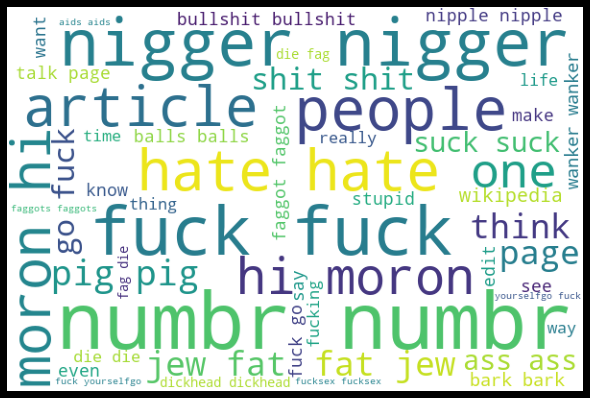

In [34]:
#creating wordcloud for malignant comments
from wordcloud import WordCloud
hams = ds_mal_train['comment_text'][ds_mal_train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(8,6),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

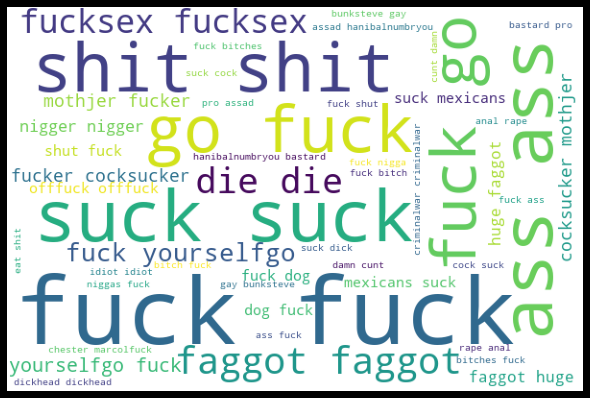

In [35]:
#creating wordcloud for highly malignant comments
from wordcloud import WordCloud
hams = ds_mal_train['comment_text'][ds_mal_train['highly_malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(8,6),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

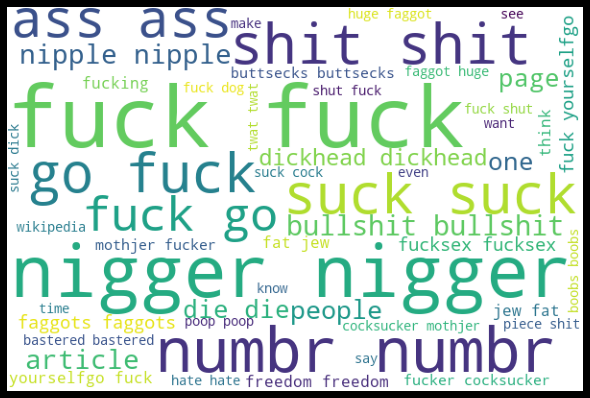

In [36]:
#creating wordcloud for rude comments
from wordcloud import WordCloud
hams = ds_mal_train['comment_text'][ds_mal_train['rude']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(8,6),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

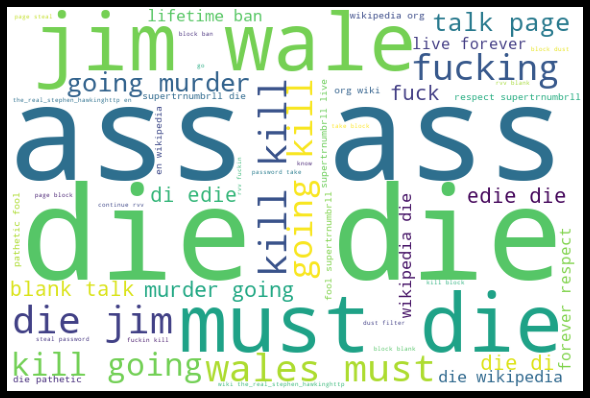

In [37]:
#creating wordcloud for threat comments
from wordcloud import WordCloud
hams = ds_mal_train['comment_text'][ds_mal_train['threat']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(8,6),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

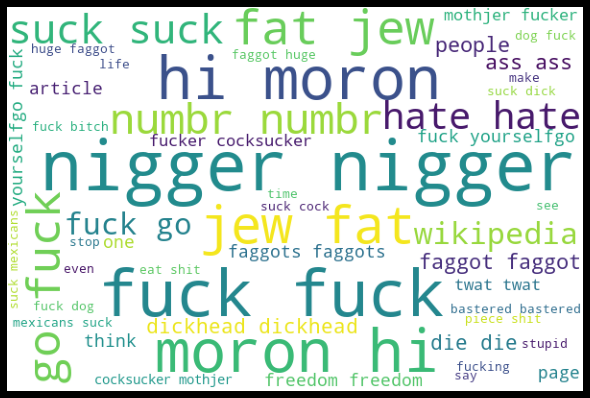

In [38]:
#creating wordcloud for abuse comments
from wordcloud import WordCloud
hams = ds_mal_train['comment_text'][ds_mal_train['abuse']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(8,6),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

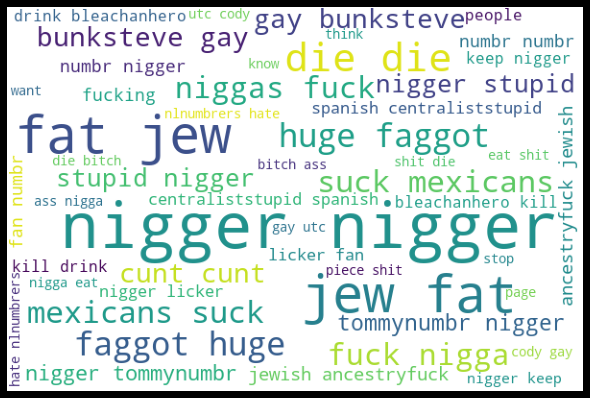

In [39]:
#creating wordcloud for loathe comments
from wordcloud import WordCloud
hams = ds_mal_train['comment_text'][ds_mal_train['loathe']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(8,6),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Making Pie Chart

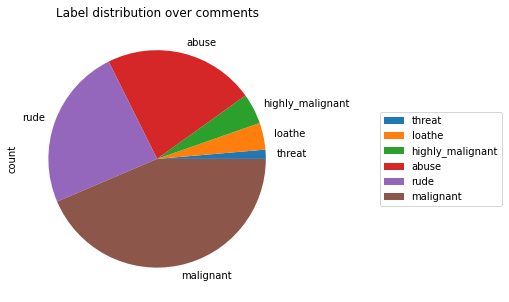

In [40]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = ds_mal_train[cols_target].sum().to_frame().rename(columns={0: 'count'}).sort_values('count')

df_distribution.plot.pie(y='count',title='Label distribution over comments',figsize=(5, 5)).legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [41]:
#seperating target variable 
target_data = ds_mal_train[cols_target]
target_data = ds_mal_train[cols_target].sum(axis =1)
print(target_data.value_counts())
print("\n")
target_data = target_data > 0 
target_data = target_data.astype(int)
print(target_data.value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64


0    143346
1     16225
dtype: int64


### 

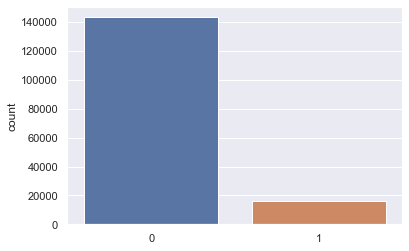

In [42]:
#plotting the distribution of labels of the target variable
sns.set()
sns.countplot(x=target_data , data = ds_mal_train)
plt.show()

### Importing Classification Algorithms and Metrices 

In [43]:
#importing text vectorization techniques
from sklearn.feature_extraction.text import TfidfVectorizer

#importing train_test_split and cross_val 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#importing classificatin Algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

#importing classification metrices
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

### Splitting Target and Input Variable

In [44]:
tf_vec=TfidfVectorizer()

features=tf_vec.fit_transform(ds_mal_train["comment_text"])

x=features

y=target_data

### Assigning Aliases

In [45]:
#assigning aliases to the algorithms
nb=MultinomialNB()
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()

### Creating Lists

In [46]:
#creating lists
models = []
models.append(('MultinomialNB',nb))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))

### Splitting Training and Testing Dataset

In [47]:
#traning and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(119678, 180118)
(39893, 180118)
(119678,)
(39893,)


### Handling Class Imbalance

In [48]:
#over sampling using SMOTE algorithms to re sample the minority classes
target_data.value_counts()

0    143346
1     16225
dtype: int64

In [49]:
#using the SMOTE algorithm
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [50]:
#using counter to count the pre re sampled data
from collections import Counter
counter=Counter(y_train)
print("Before",counter)

Before Counter({0: 107512, 1: 12166})


In [51]:
#using counter to count the post re sampled data
counter=Counter(y_train_res)
print("After",counter)

After Counter({0: 107512, 1: 107512})


### Machine Learning

#### Multinomial NB

Accuracy score is: 0.9205123705913318


Cross_val_score is: 0.9206058768684666


Classification_report
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     35834
           1       0.58      0.81      0.67      4059

    accuracy                           0.92     39893
   macro avg       0.78      0.87      0.81     39893
weighted avg       0.94      0.92      0.93     39893



Confusion_matirx
[[33431  2403]
 [  768  3291]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





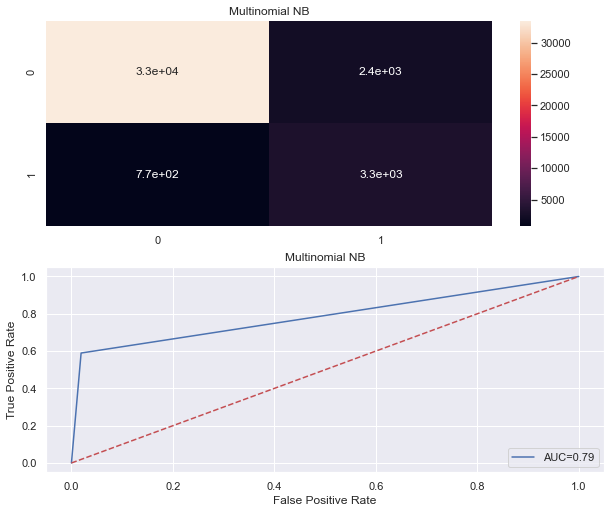

In [56]:
nb.fit(x_train_res,y_train_res)
pred=nb.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,pred))
print("\n")

print("Cross_val_score is:",cross_val_score(nb,x,y,cv=10).mean())
print("\n")

print("Classification_report")
print(classification_report(y_test,pred))
print("\n")

print("Confusion_matirx")
cm=confusion_matrix(y_test,pred)
print(cm)
print("\n")

plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Multinomial NB")
print(sns.heatmap(cm,annot=True))
plt.subplot(912)
plt.title("Multinomial NB")
plt.plot(false_positive_rate,true_positive_rate,label="AUC=%0.2f"% roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.legend(loc="lower right")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
print("\n\n")

#### Logistic Regression

Accuracy score is: 0.9205123705913318


Cross_val_score is: 0.9206058768684666


Classification_report
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     35834
           1       0.58      0.81      0.67      4059

    accuracy                           0.92     39893
   macro avg       0.78      0.87      0.81     39893
weighted avg       0.94      0.92      0.93     39893



Confusion_matirx
[[33431  2403]
 [  768  3291]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





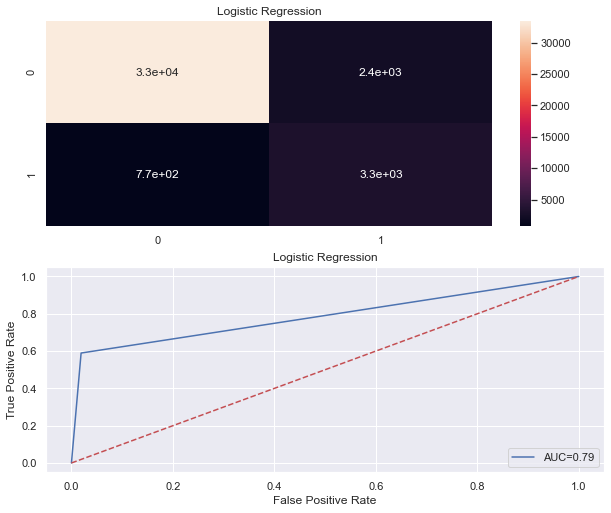

In [54]:
lr.fit(x_train_res,y_train_res)
pred=nb.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,pred))
print("\n")

print("Cross_val_score is:",cross_val_score(nb,x,y,cv=10).mean())
print("\n")

print("Classification_report")
print(classification_report(y_test,pred))
print("\n")

print("Confusion_matirx")
cm=confusion_matrix(y_test,pred)
print(cm)
print("\n")

plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Logistic Regression")
print(sns.heatmap(cm,annot=True))
plt.subplot(912)
plt.title("Logistic Regression")
plt.plot(false_positive_rate,true_positive_rate,label="AUC=%0.2f"% roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.legend(loc="lower right")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
print("\n\n")

#### Descision Tree Classifier

Accuracy score is: 0.9205123705913318


Cross_val_score is: 0.9206058768684666


Classification_report
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     35834
           1       0.58      0.81      0.67      4059

    accuracy                           0.92     39893
   macro avg       0.78      0.87      0.81     39893
weighted avg       0.94      0.92      0.93     39893



Confusion_matirx
[[33431  2403]
 [  768  3291]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





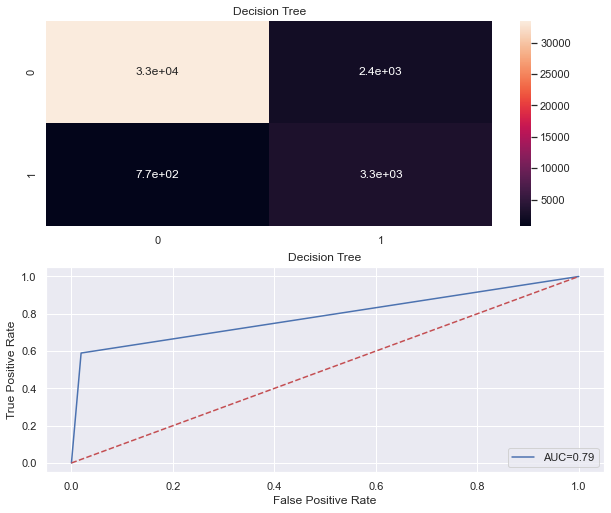

In [58]:
dtc.fit(x_train_res,y_train_res)
pred=nb.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,pred))
print("\n")

print("Cross_val_score is:",cross_val_score(nb,x,y,cv=10).mean())
print("\n")

print("Classification_report")
print(classification_report(y_test,pred))
print("\n")

print("Confusion_matirx")
cm=confusion_matrix(y_test,pred)
print(cm)
print("\n")

plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Decision Tree")
print(sns.heatmap(cm,annot=True))
plt.subplot(912)
plt.title("Decision Tree")
plt.plot(false_positive_rate,true_positive_rate,label="AUC=%0.2f"% roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.legend(loc="lower right")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
print("\n\n")

#### Random Forest Classifier

Accuracy score is: 0.9205123705913318


Cross_val_score is: 0.9206058768684666


Classification_report
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     35834
           1       0.58      0.81      0.67      4059

    accuracy                           0.92     39893
   macro avg       0.78      0.87      0.81     39893
weighted avg       0.94      0.92      0.93     39893



Confusion_matirx
[[33431  2403]
 [  768  3291]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





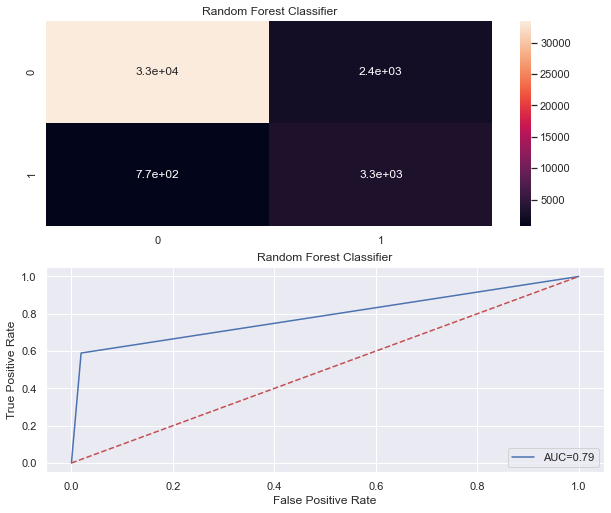

In [59]:
rfc.fit(x_train_res,y_train_res)
pred=nb.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,pred))
print("\n")

print("Cross_val_score is:",cross_val_score(nb,x,y,cv=10).mean())
print("\n")

print("Classification_report")
print(classification_report(y_test,pred))
print("\n")

print("Confusion_matirx")
cm=confusion_matrix(y_test,pred)
print(cm)
print("\n")

plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Random Forest Classifier")
print(sns.heatmap(cm,annot=True))
plt.subplot(912)
plt.title("Random Forest Classifier")
plt.plot(false_positive_rate,true_positive_rate,label="AUC=%0.2f"% roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.legend(loc="lower right")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
print("\n\n")

We are finalizing the Multinomial NB model.

### Saving Model 

In [61]:
import joblib
joblib.dump(nb,"Model_Malignant_Comments_Classifier_nb.csv")

['Model_Malignant_Comments_Classifier_nb.csv']

### Loading Model

In [62]:
Model_Malignant_Comments_Classifier=joblib.load("Model_Malignant_Comments_Classifier_nb.csv")

### Using Model

In [63]:
Model_Malignant_Comments_Classifier.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0])